In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data = pd.read_csv("datos.csv",  sep = ',',index_col=100)

data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z,labels
frame,,,,,,,,,,,,,,,,,,,,,
0,0.504806,0.373217,-0.161630,0.513347,0.371245,-0.154843,0.517347,0.374575,-0.154899,0.518842,...,0.393304,0.646589,-0.081423,0.420774,0.712442,-0.137218,0.364911,0.650783,-0.142738,['walking_to_camera']
1,0.506520,0.374991,0.048797,0.516705,0.375186,0.053818,0.518699,0.378395,0.053746,0.521904,...,0.400147,0.604425,-0.107653,0.428862,0.639271,-0.119270,0.372454,0.612847,-0.144582,['walking_to_camera']
2,0.507082,0.372146,-0.062295,0.515595,0.371393,-0.057670,0.518152,0.375201,-0.057715,0.520105,...,0.409823,0.600580,-0.080352,0.450748,0.662075,-0.123882,0.390926,0.611185,-0.120736,['walking_to_camera']
3,0.513589,0.371991,0.103451,0.522313,0.375967,0.113794,0.523040,0.379343,0.113717,0.523814,...,0.389847,0.645241,-0.326471,0.399322,0.628258,-0.352266,0.376534,0.633026,-0.379692,['walking_to_camera']
4,0.505657,0.373006,-0.089358,0.517770,0.372798,-0.074540,0.519424,0.375940,-0.074557,0.523168,...,0.394286,0.654259,-0.159810,0.503077,0.778289,-0.308295,0.364966,0.634571,-0.227055,['walking_to_camera']


In [4]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
count,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,...,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000,15450.000000
mean,0.498540,0.343783,-0.231218,0.503426,0.332222,-0.232046,0.506268,0.332117,-0.232200,0.508751,...,0.221161,0.470383,0.803399,0.220523,0.519467,0.828117,0.101879,0.457556,0.825670,0.100842
std,0.071439,0.102847,0.279310,0.071686,0.104767,0.255357,0.072635,0.104793,0.255395,0.073796,...,0.277328,0.071614,0.135052,0.294816,0.092012,0.139261,0.299987,0.082130,0.141856,0.321816
min,0.035200,0.067125,-1.193762,0.042681,0.047984,-1.177193,0.044100,0.046947,-1.177312,0.046071,...,-0.785160,0.080632,0.330074,-0.792280,0.044126,0.309023,-0.923919,0.035805,0.296953,-0.944860
25%,0.465734,0.293823,-0.432917,0.467763,0.283970,-0.413011,0.467569,0.283681,-0.413156,0.468161,...,0.128182,0.429917,0.685849,0.133857,0.461372,0.710926,0.030595,0.403964,0.703770,0.004672
50%,0.500168,0.336449,-0.323715,0.507075,0.325402,-0.307066,0.510593,0.325226,-0.307275,0.513438,...,0.253884,0.473086,0.853744,0.242506,0.521923,0.873547,0.137187,0.463402,0.872610,0.137497
75%,0.534337,0.382719,0.000950,0.542705,0.372953,-0.019059,0.548324,0.373133,-0.019138,0.552962,...,0.373459,0.504521,0.898831,0.357867,0.590427,0.927916,0.247784,0.499429,0.931756,0.256417
max,0.894403,0.659586,0.583496,0.900603,0.655095,0.560154,0.904538,0.655714,0.560155,0.908393,...,1.097981,0.900510,1.807593,1.251613,0.885600,1.871233,1.018987,0.872183,1.846127,1.164543


In [5]:
#Theonly None valus ar the labels
data.dropna(inplace=True)


In [6]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
count,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,...,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000,10377.000000
mean,0.502257,0.344127,-0.230233,0.507040,0.332754,-0.230192,0.509843,0.332650,-0.230344,0.512303,...,0.217479,0.470119,0.793206,0.206547,0.523197,0.817052,0.100757,0.458842,0.815230,0.087830
std,0.074448,0.098850,0.273784,0.074831,0.100774,0.250304,0.075831,0.100810,0.250343,0.077039,...,0.289342,0.073540,0.134817,0.299008,0.094556,0.139167,0.312400,0.084712,0.142112,0.326921
min,0.035200,0.068136,-1.141598,0.042681,0.047984,-1.137283,0.044100,0.046947,-1.137395,0.046071,...,-0.785160,0.080632,0.330074,-0.792280,0.044126,0.350902,-0.897201,0.035805,0.307016,-0.913340
25%,0.470232,0.293168,-0.428630,0.470593,0.283041,-0.407541,0.471136,0.282952,-0.407733,0.471415,...,0.116955,0.431343,0.667221,0.116389,0.462365,0.696676,0.025269,0.404613,0.688739,-0.009015
50%,0.503048,0.334830,-0.319576,0.509866,0.324816,-0.303134,0.512693,0.324364,-0.303283,0.515347,...,0.248389,0.473621,0.846778,0.233300,0.523189,0.861641,0.137251,0.463964,0.863601,0.131076
75%,0.538020,0.381004,-0.009264,0.548876,0.369162,-0.025585,0.555083,0.369057,-0.025594,0.559947,...,0.382139,0.504754,0.893044,0.351580,0.594963,0.921233,0.255067,0.500350,0.927785,0.252327
max,0.894403,0.659586,0.583496,0.900603,0.647444,0.560154,0.904538,0.646863,0.560155,0.908393,...,1.097981,0.900510,1.644173,1.251613,0.885600,1.683572,1.018987,0.872183,1.715982,1.164543


In [7]:
data['labels'].unique()

array(["['walking_to_camera']", "['walking_away']", "['spinning']",
       "['walking_left_to_right']", "['walking_right_to_left']",
       "['spinning', 'siting_down']", "['standing_up']",
       "['walking_away', 'spinning']", "['siting_down']",
       "['walking_to_camera', 'walking_away']",
       "['walking_to_camera', 'spinning']"], dtype=object)

In [8]:
data = data[~data['labels'].isin(["['walking_right_to_left']", "['walking_left_to_right']"])]
data.reset_index(drop=True, inplace=True)

In [9]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
count,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,...,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000,10219.000000
mean,0.502140,0.346792,-0.231746,0.506973,0.335499,-0.231645,0.509808,0.335391,-0.231798,0.512293,...,0.217982,0.469680,0.790612,0.206744,0.523457,0.814569,0.100276,0.458309,0.812642,0.087060
std,0.067777,0.097215,0.275352,0.068320,0.099057,0.251659,0.069450,0.099101,0.251698,0.070796,...,0.291088,0.067825,0.134093,0.300867,0.090173,0.138564,0.314324,0.079643,0.141581,0.328888
min,0.045730,0.068136,-1.141598,0.056401,0.047984,-1.137283,0.062354,0.046947,-1.137395,0.067870,...,-0.785160,0.080632,0.330074,-0.792280,0.044126,0.350902,-0.897201,0.035805,0.307016,-0.913340
25%,0.470787,0.295794,-0.430334,0.471302,0.285239,-0.409230,0.471581,0.284994,-0.409427,0.471741,...,0.119275,0.432092,0.664815,0.118334,0.463349,0.694505,0.024911,0.405111,0.685928,-0.009078
50%,0.502994,0.336332,-0.324086,0.509823,0.326196,-0.306846,0.512664,0.326030,-0.307022,0.515327,...,0.249413,0.473512,0.844126,0.233421,0.523405,0.858848,0.137518,0.463813,0.859876,0.130908
75%,0.537442,0.381700,0.001551,0.548310,0.370141,-0.018892,0.554285,0.370055,-0.018994,0.559106,...,0.384660,0.504099,0.891335,0.352848,0.594664,0.920100,0.254900,0.499454,0.925509,0.252046
max,0.894388,0.659586,0.583496,0.900603,0.647444,0.560154,0.904538,0.646863,0.560155,0.908393,...,1.097981,0.898107,1.644173,1.251613,0.885600,1.683572,1.018987,0.872183,1.715982,1.164543


In [10]:
data = data[data['labels'].str.len() <= 21]
data.reset_index(drop=True, inplace=True)

In [11]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_29_z,landmark_30_x,landmark_30_y,landmark_30_z,landmark_31_x,landmark_31_y,landmark_31_z,landmark_32_x,landmark_32_y,landmark_32_z
count,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,...,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000
mean,0.502057,0.347515,-0.228070,0.506802,0.336386,-0.227984,0.509581,0.336288,-0.228135,0.512020,...,0.216089,0.469556,0.786995,0.206135,0.522091,0.810835,0.099053,0.457910,0.808782,0.087433
std,0.067961,0.096087,0.274442,0.068396,0.097983,0.250670,0.069423,0.098044,0.250710,0.070675,...,0.289265,0.068459,0.135758,0.298495,0.089255,0.140089,0.312890,0.080167,0.143256,0.326766
min,0.045730,0.068136,-1.141598,0.056401,0.047984,-1.137283,0.062354,0.046947,-1.137395,0.067870,...,-0.785160,0.080632,0.330074,-0.792280,0.044126,0.350902,-0.897201,0.035805,0.307016,-0.913340
25%,0.470817,0.297904,-0.428276,0.471317,0.287526,-0.406872,0.471578,0.287325,-0.407111,0.471733,...,0.122009,0.431648,0.658858,0.122921,0.462926,0.687895,0.027622,0.404307,0.678820,-0.006361
50%,0.502679,0.338217,-0.320161,0.509371,0.327928,-0.303274,0.512426,0.327554,-0.303377,0.514896,...,0.247632,0.474579,0.837710,0.233297,0.522522,0.855053,0.136171,0.464440,0.851979,0.133752
75%,0.535849,0.381358,0.008517,0.545955,0.369585,-0.012921,0.551783,0.369623,-0.013017,0.556807,...,0.380113,0.504427,0.889737,0.354246,0.593646,0.919469,0.253750,0.498544,0.924290,0.253569
max,0.894388,0.644527,0.583496,0.900603,0.647444,0.560154,0.904538,0.646863,0.560155,0.908393,...,1.097981,0.898107,1.644173,1.251613,0.885600,1.683572,1.018987,0.872183,1.715982,1.107080


Varianza explicada por cada componente principal:
Componente 1: 0.3064
Componente 2: 0.1994
Componente 3: 0.1751
Componente 4: 0.1101
Componente 5: 0.0992
Componente 6: 0.0356
Componente 7: 0.0320
Componente 8: 0.0089
Componente 9: 0.0071
Componente 10: 0.0064
Componente 11: 0.0046
Componente 12: 0.0026
Componente 13: 0.0025
Componente 14: 0.0020
Componente 15: 0.0017
Componente 16: 0.0011


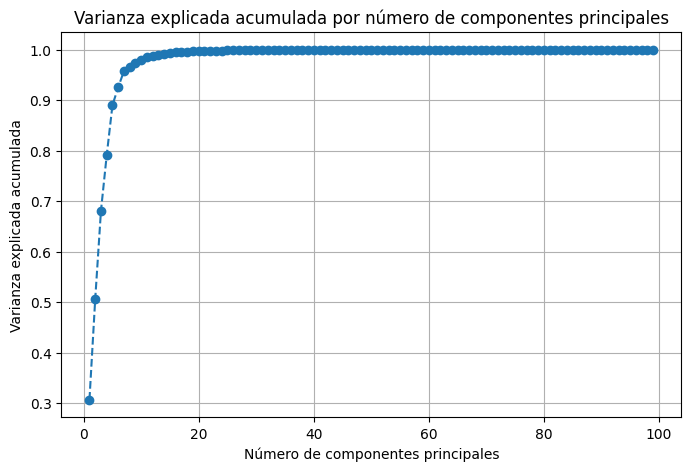

In [18]:
#Calcular la varianza explicada acumulada

data_2=data.drop('labels', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

/tmp/ipykernel_68642/2234185586.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


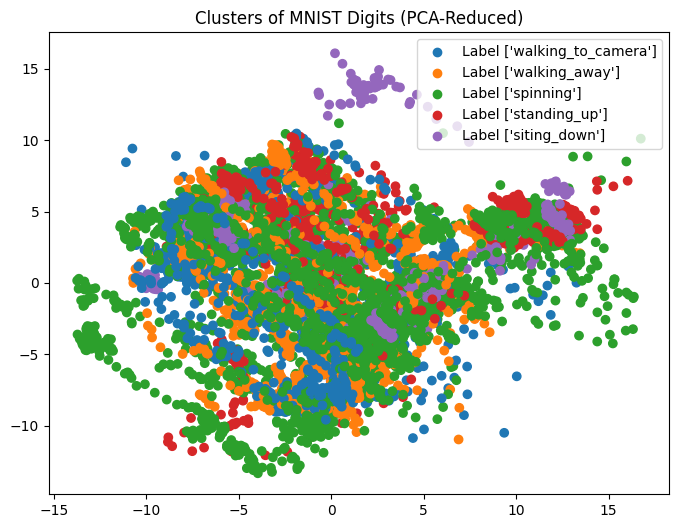

In [19]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


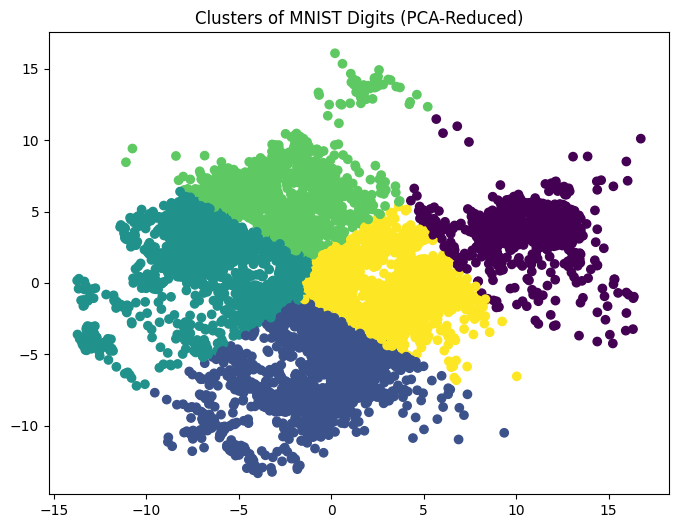

In [20]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

In [12]:
result_data = []

df = data.copy()

grouped = df.groupby('labels')

for label, group in grouped:

    for i in range(0, len(group)-5):
        frame_group = group.iloc[i:i + 5]


        if len(frame_group) >= 5:

            group_data = {'label': label}
            for j in range(33):  
                for k in range(5): 
                    group_data[f'landmark_{j}_x_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_x']
                    group_data[f'landmark_{j}_y_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_y']
                    group_data[f'landmark_{j}_z_frame_{k+1}'] = frame_group.iloc[k][f'landmark_{j}_z']

            result_data.append(group_data)


result_df = pd.DataFrame(result_data)

result_df

,label,landmark_0_x_frame_1,landmark_0_y_frame_1,landmark_0_z_frame_1,landmark_0_x_frame_2,landmark_0_y_frame_2,landmark_0_z_frame_2,landmark_0_x_frame_3,landmark_0_y_frame_3,landmark_0_z_frame_3,...,landmark_32_z_frame_2,landmark_32_x_frame_3,landmark_32_y_frame_3,landmark_32_z_frame_3,landmark_32_x_frame_4,landmark_32_y_frame_4,landmark_32_z_frame_4,landmark_32_x_frame_5,landmark_32_y_frame_5,landmark_32_z_frame_5
0,['siting_down'],0.509687,0.324699,-0.227474,0.510647,0.323590,-0.235108,0.513021,0.324192,-0.262841,...,0.268661,0.475833,0.861373,0.302870,0.473264,0.855467,0.279753,0.472534,0.863601,0.277355
1,['siting_down'],0.510647,0.323590,-0.235108,0.513021,0.324192,-0.262841,0.509936,0.318470,-0.192443,...,0.302870,0.473264,0.855467,0.279753,0.472534,0.863601,0.277355,0.471186,0.867253,0.215658
2,['siting_down'],0.513021,0.324192,-0.262841,0.509936,0.318470,-0.192443,0.512552,0.317615,-0.202410,...,0.279753,0.472534,0.863601,0.277355,0.471186,0.867253,0.215658,0.469648,0.882886,0.204324
3,['siting_down'],0.509936,0.318470,-0.192443,0.512552,0.317615,-0.202410,0.513035,0.317303,-0.203149,...,0.277355,0.471186,0.867253,0.215658,0.469648,0.882886,0.204324,0.469309,0.899007,0.186413
4,['siting_down'],0.512552,0.317615,-0.202410,0.513035,0.317303,-0.203149,0.516664,0.318907,-0.199233,...,0.215658,0.469648,0.882886,0.204324,0.469309,0.899007,0.186413,0.467489,0.911484,0.179865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9688,['walking_to_camera'],0.413987,0.230474,0.063574,0.408812,0.231420,0.005606,0.406785,0.232757,-0.052484,...,0.827779,0.460143,0.848777,0.828063,0.459636,0.847835,0.787592,0.448957,0.845638,0.995222
9689,['walking_to_camera'],0.408812,0.231420,0.005606,0.406785,0.232757,-0.052484,0.396137,0.233101,-0.161449,...,0.828063,0.459636,0.847835,0.787592,0.448957,0.845638,0.995222,0.444669,0.850150,0.904332
9690,['walking_to_camera'],0.406785,0.232757,-0.052484,0.396137,0.233101,-0.161449,0.389477,0.233377,-0.212593,...,0.787592,0.448957,0.845638,0.995222,0.444669,0.850150,0.904332,0.436577,0.848863,0.994172
9691,['walking_to_camera'],0.396137,0.233101,-0.161449,0.389477,0.233377,-0.212593,0.379406,0.231763,-0.246028,...,0.995222,0.444669,0.850150,0.904332,0.436577,0.848863,0.994172,0.447240,0.849216,0.854488


Varianza explicada por cada componente principal:
Componente 1: 0.2971
Componente 2: 0.1887
Componente 3: 0.1648
Componente 4: 0.1056
Componente 5: 0.0933
Componente 6: 0.0319
Componente 7: 0.0291
Componente 8: 0.0079
Componente 9: 0.0077
Componente 10: 0.0065
Componente 11: 0.0062
Componente 12: 0.0055
Componente 13: 0.0051
Componente 14: 0.0041
Componente 15: 0.0035
Componente 16: 0.0027
Componente 17: 0.0024
Componente 18: 0.0021
Componente 19: 0.0020
Componente 20: 0.0019
Componente 21: 0.0019
Componente 22: 0.0017
Componente 23: 0.0017
Componente 24: 0.0016
Componente 25: 0.0015
Componente 26: 0.0014
Componente 27: 0.0014
Componente 28: 0.0012
Componente 29: 0.0011


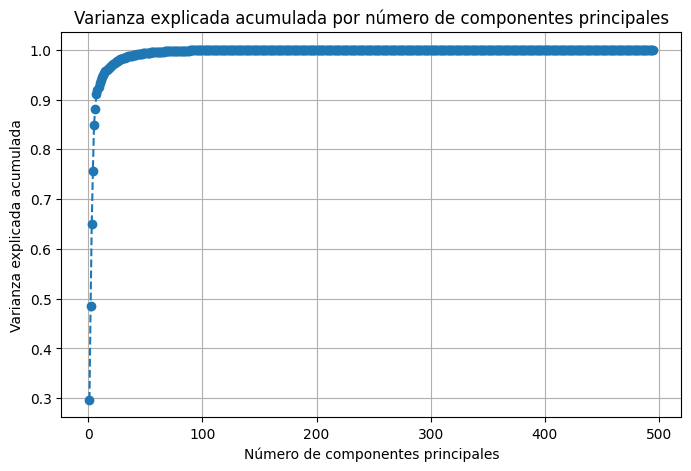

In [13]:
#Calcular la varianza explicada acumulada

data_group=result_df.drop('label', axis=1)
X = StandardScaler().fit_transform(data_group)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

/tmp/ipykernel_323262/1628319642.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


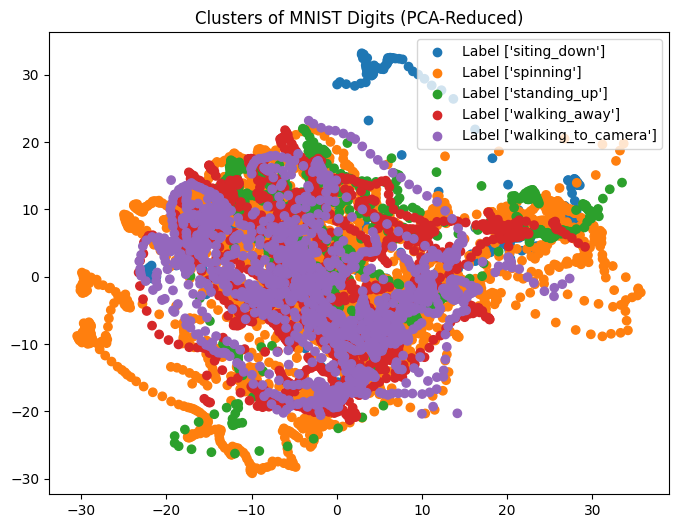

In [14]:
labels = result_df['label']

data_group=result_df.drop('label', axis=1)

X = StandardScaler().fit_transform(data_group)

pca = PCA(n_components=29)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

/tmp/ipykernel_323262/4192807430.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)


Text(0, 0.5, 't-SNE 2')

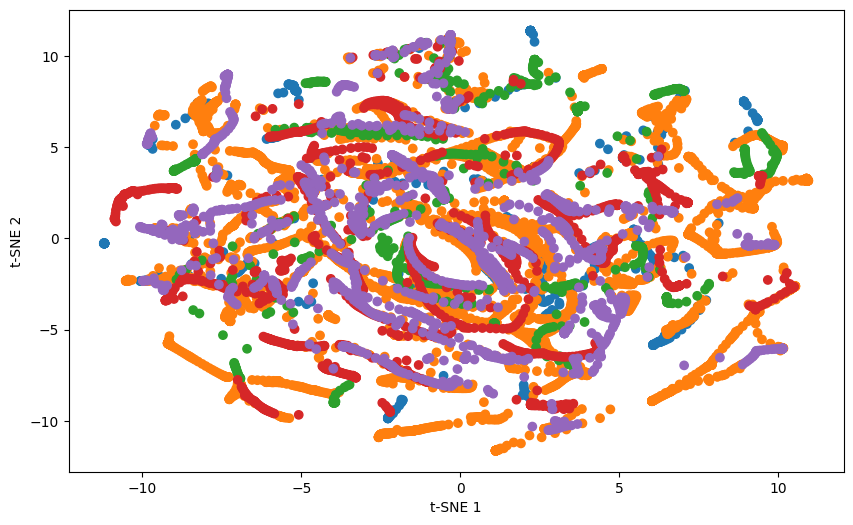

In [15]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=1, init='pca')
tsne_features = tsne.fit_transform(X)

# Plot the TSNE results without label
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [16]:
from sklearn.preprocessing import LabelEncoder

# Transform labels into a numeric variable
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(X, numeric_labels, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)

In [23]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.964414646725116

Matriz de Confusión:
 [[170   7   0   0   1]
 [  0 897   2   3   4]
 [  1   5 185   5   4]
 [  0  14   1 319   7]
 [  1  10   2   2 299]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.96      0.99      0.98       906
           2       0.97      0.93      0.95       200
           3       0.97      0.94      0.95       341
           4       0.95      0.95      0.95       314

    accuracy                           0.96      1939
   macro avg       0.97      0.95      0.96      1939
weighted avg       0.96      0.96      0.96      1939

